## Sentiment Analysis on Facebook Posts from Late 2016 - Present

I downloaded and performed a simple sentiment anaysis on my Facebook posts from this period.  I provide explanations of the step I took. For more details, read the code comments (green italicised text preceded by the "#" sign). 

### Importing libraries and data 

In [1]:

import json 
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
from textblob import TextBlob, Word

#reading from downloaded Facebook posts

with open ("fbposts16_19.json", "r") as data: 
    json_data=data.read()

    #I turn the json data into a list for easy manipulation 
    json_data_list=json.loads(json_data)


### Studying the data structure of an item in the list

Note: I found that, depending on the type of post, each dictionary in the list is structured differently. Notably, I ran into problems when I tried to extract information in json_data_list[i]["data"'], because "data" was a non-existent key value for some items. 

In [2]:
print(json_data_list[0])
print(",,,,,,,")
print(json_data_list[0]["data"])
print("-----")
print(json_data_list[0]["data"][0])
print("......")
print(json_data_list[0]["data"][0]["post"])

{'timestamp': 1573565899, 'attachments': [{'data': [{'external_context': {'url': 'https://uk.reuters.com/article/us-britian-eu-floods-aid-idUKKBN1761EQ'}}]}], 'data': [{'post': '"In total, Britain has been allocated more than 220 million euros in EU solidarity aid [the fund is used to help member states that have suffered natural disasters] , making the country the third largest beneficiary after Italy and Germany."'}, {'update_timestamp': 1573565899}], 'title': 'Vernie Oliveiro'}
,,,,,,,
[{'post': '"In total, Britain has been allocated more than 220 million euros in EU solidarity aid [the fund is used to help member states that have suffered natural disasters] , making the country the third largest beneficiary after Italy and Germany."'}, {'update_timestamp': 1573565899}]
-----
{'post': '"In total, Britain has been allocated more than 220 million euros in EU solidarity aid [the fund is used to help member states that have suffered natural disasters] , making the country the third larg

In [3]:
len(json_data_list)

2465

This extracts the relevant list items into a new list, "a". 

In [4]:
a=[]

for item in json_data_list:
    if "data" in item:
        a.append(item)
        
print(a[0])
print(len(a))

{'timestamp': 1573565899, 'attachments': [{'data': [{'external_context': {'url': 'https://uk.reuters.com/article/us-britian-eu-floods-aid-idUKKBN1761EQ'}}]}], 'data': [{'post': '"In total, Britain has been allocated more than 220 million euros in EU solidarity aid [the fund is used to help member states that have suffered natural disasters] , making the country the third largest beneficiary after Italy and Germany."'}, {'update_timestamp': 1573565899}], 'title': 'Vernie Oliveiro'}
2455


### Adding additional data to the list 

I use TextBlob to perform sentiment analysis for polarity and subjectivity. I also convert the timestamp to readable date time. 

In [5]:
for i in range(len(a)): 
    #performing sentiment analysis for polarity 
    result1=TextBlob(str(a[i]["data"])).sentiment.polarity
    #performing sentiment analysis for subjectivity 
    result2=TextBlob(str(a[i]["data"])).sentiment.subjectivity
    #converting timestamp to datetime 
    date=datetime.utcfromtimestamp(a[i]["timestamp"]).strftime('%Y-%m-%d %H:%M:%S')
    #writing new information into the json file
    with open("your_posts_1.json", "a") as new: 
        a[i]["mood"]=result1
        a[i]["subj"]=result2
        a[i]["date"]=date
        new.write(str(result1))
        new.write(str(result2))

#visualing what each item looks like
print(a[0])
    

{'timestamp': 1573565899, 'attachments': [{'data': [{'external_context': {'url': 'https://uk.reuters.com/article/us-britian-eu-floods-aid-idUKKBN1761EQ'}}]}], 'data': [{'post': '"In total, Britain has been allocated more than 220 million euros in EU solidarity aid [the fund is used to help member states that have suffered natural disasters] , making the country the third largest beneficiary after Italy and Germany."'}, {'update_timestamp': 1573565899}], 'title': 'Vernie Oliveiro', 'mood': 0.15, 'subj': 0.4125, 'date': '2019-11-12 13:38:19'}


### I turn the list into a Pandas dataframe to enable data analysis

In [6]:
newfbposts = pd.DataFrame.from_dict(a, orient="columns")

#visualising the dataframe
newfbposts.head()

,timestamp,attachments,data,title,mood,subj,date,tags
0,1573565899,[{'data': [{'external_context': {'url': 'https...,"[{'post': '""In total, Britain has been allocat...",Vernie Oliveiro,0.150000,0.412500,2019-11-12 13:38:19,NaN
1,1573405924,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'Eyes on the ball!! Looking forward ...,NaN,0.000000,0.000000,2019-11-10 17:12:04,NaN
2,1573266620,[{'data': [{'external_context': {'url': 'https...,[{'post': 'Arguably a result of what frequentl...,Vernie Oliveiro,0.120000,0.206667,2019-11-09 02:30:20,NaN
3,1573239861,[{'data': [{'external_context': {'url': 'https...,"[{'post': 'Vitamin E acetate ""used as an addit...",Vernie Oliveiro,0.000000,0.100000,2019-11-08 19:04:21,NaN
4,1573141187,[],[{'post': 'I feel like this dad is teaching hi...,Vernie Oliveiro,0.023611,0.227431,2019-11-07 15:39:47,NaN


In [7]:
newfbposts.columns

Index(['timestamp', 'attachments', 'data', 'title', 'mood', 'subj', 'date',
       'tags'],
      dtype='object')

I remove columns that are unnecessary for this analysis

In [8]:
newfbposts.drop("timestamp", axis=1, inplace=True)
newfbposts.drop("attachments", axis=1, inplace=True)
newfbposts.drop("title", axis=1, inplace=True)
newfbposts.drop("tags", axis=1, inplace=True)

newfbposts.columns

Index(['data', 'mood', 'subj', 'date'], dtype='object')

In [9]:
# I rearrange the dataframe so that the least recent date is listed first. 
newfbposts.sort_values(by='date', ascending=True, inplace=True)

newfbposts.head()


,data,mood,subj,date
2454,"[{'post': 'The ""alt-right"" and Trump's new Chi...",0.100081,0.452800,2016-11-14 00:19:11
2453,"[{'post': 'When one exercises ""religious freed...",0.000000,0.425000,2016-11-14 07:41:33
2452,"[{'post': '""The main problem: good and selfles...",-0.078526,0.655769,2016-11-14 12:56:33
2451,[{'post': '1) One thing I really miss about th...,0.175000,0.450000,2016-11-14 15:37:14
2450,[{'post': 'Why I'm hesitant to empathise with ...,-0.053611,0.317361,2016-11-14 17:20:11


In [10]:
newfbposts.reset_index(inplace=True)

In [11]:
newfbposts.columns

Index(['index', 'data', 'mood', 'subj', 'date'], dtype='object')

In [12]:
newfbposts.head()

,index,data,mood,subj,date
0,2454,"[{'post': 'The ""alt-right"" and Trump's new Chi...",0.100081,0.452800,2016-11-14 00:19:11
1,2453,"[{'post': 'When one exercises ""religious freed...",0.000000,0.425000,2016-11-14 07:41:33
2,2452,"[{'post': '""The main problem: good and selfles...",-0.078526,0.655769,2016-11-14 12:56:33
3,2451,[{'post': '1) One thing I really miss about th...,0.175000,0.450000,2016-11-14 15:37:14
4,2450,[{'post': 'Why I'm hesitant to empathise with ...,-0.053611,0.317361,2016-11-14 17:20:11


In [13]:
# i import the necessary libraries
from datetime import timedelta
from datetime import datetime

#and turn the "date" object into a pandas datetime series. This will facilitate time series analysis. 
newfbposts['date'] = pd.to_datetime(newfbposts.date)
newfbposts.dtypes

index             int64
data             object
mood            float64
subj            float64
date     datetime64[ns]
dtype: object

### Create the dataframe whose data we will visualise

I found that visulising every single data point created a visually confusing graph. 
So, I have taken the mean mood and subj scores of posts per day to approximate my mood or subjectivity scores for that day. 

In [14]:
newfbposts.set_index('date', inplace=True)
newfbposts2 = newfbposts.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
newfbposts2.head()

,index,mood,subj
date,,,
2016-11-14,2452.0,0.028589,0.460186
2016-11-15,2445.5,0.121402,0.311870
2016-11-16,2438.0,0.078078,0.365476
2016-11-17,2432.5,0.134600,0.630517
2016-11-18,2429.0,0.133333,0.436667


In [18]:
newfbposts.columns

Index(['index', 'data', 'mood', 'subj'], dtype='object')

In [19]:
newfbposts2.reset_index(inplace=True)
newfbposts.columns

Index(['index', 'data', 'mood', 'subj'], dtype='object')

In [20]:
newfbposts.head()

,index,data,mood,subj
date,,,,
2016-11-14 00:19:11,2454,"[{'post': 'The ""alt-right"" and Trump's new Chi...",0.100081,0.452800
2016-11-14 07:41:33,2453,"[{'post': 'When one exercises ""religious freed...",0.000000,0.425000
2016-11-14 12:56:33,2452,"[{'post': '""The main problem: good and selfles...",-0.078526,0.655769
2016-11-14 15:37:14,2451,[{'post': '1) One thing I really miss about th...,0.175000,0.450000
2016-11-14 17:20:11,2450,[{'post': 'Why I'm hesitant to empathise with ...,-0.053611,0.317361


### Visualising mood

/Users/vernieoliveiro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


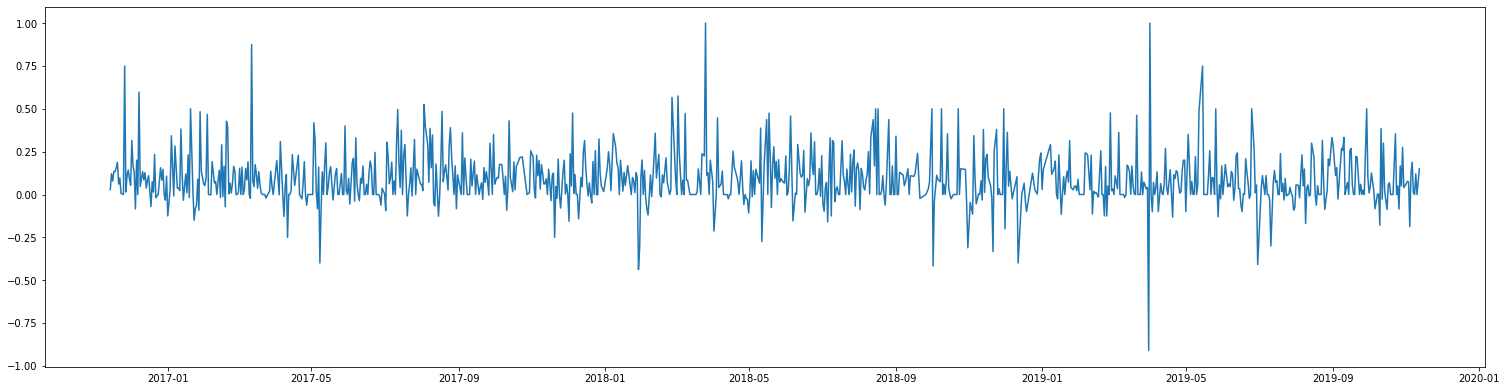

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates


#visualising mood

X=newfbposts2["date"]
y=newfbposts2["mood"]

fig=plt.figure(figsize=(20,5))
fig.add_axes([0,0,1,1])

plt.plot(X, y)

In [ ]:
# X=newfbposts2["date"]
# y=newfbposts2["subj"]

# fig=plt.figure(figsize=(20,5))
# fig.add_axes([0,0,1,1])

# plt.plot(X, y)
